In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

### Data Preprocessing

In [63]:
data = pd.read_csv('data.csv')

In [64]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [84]:
x_data = data['sqft_living']
y_data = data['price']

In [85]:
x_data

0       1340
1       3650
2       1930
3       2000
4       1940
        ... 
4595    1510
4596    1460
4597    3010
4598    2090
4599    1490
Name: sqft_living, Length: 4600, dtype: int64

In [86]:
y_data

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [87]:
len(x_data), len(y_data)

(4600, 4600)

In [88]:
# 80% train, 20% - validation : random selection

In [89]:
def train_validation_split(x, y, validation_size=0.2, random_state=None):
    x_validation = x.sample(frac=validation_size, random_state=random_state)
    y_validation = y[x_validation.index]

    x_train = x.drop(x_validation.index)
    y_train = y.drop(y_validation.index)

    return np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation)

In [217]:
x_train, y_train, x_validation, y_validation = train_validation_split(x_data, y_data, validation_size=0.2, random_state=15)

In [218]:
len(x_train), len(y_train)

(3680, 3680)

In [219]:
len(x_validation), len(y_validation)

(920, 920)

In [220]:
x_train

array([1340, 3650, 1940, ..., 1460, 3010, 1490], dtype=int64)

In [221]:
y_train

array([ 313000.      , 2384000.      ,  550000.      , ...,
        534333.333333,  416904.166667,  220600.      ])

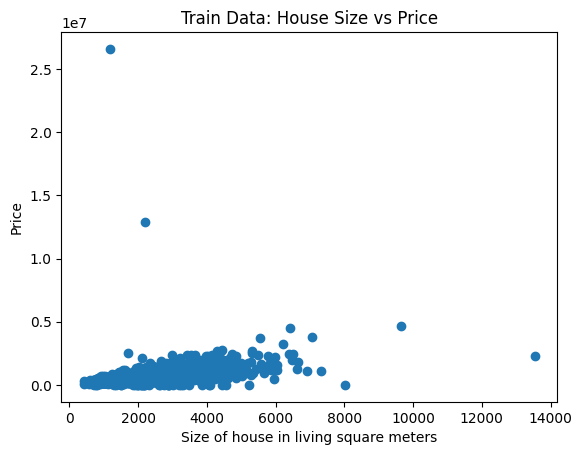

In [222]:
plt.scatter(x_train, y_train)
plt.title("Train Data: House Size vs Price")
plt.xlabel("Size of house in living square meters")
plt.ylabel("Price")
plt.show()

In [223]:
x_train.shape

(3680,)

### Train

In [224]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(0, m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
        
    total_cost = cost / (2 * m)
    return total_cost    

In [225]:
def compute_gradients(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(0, m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [263]:
def gradient_descent(x, y, w_in, b_in, alpha, num_inters, cost_function, gradient_function):
    # pas by object reference
    # shallow copy vs deep copy
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)

    # cost function evolution - loss
    J_history = []

    for i in range(0, num_inters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(cost_function(x, y, w, b))

        print(f"Iteration: {i} | Cost: {J_history[i]:.4} | dj_dw: {dj_dw:.4} | dj_db: {dj_db:.4} | w: {w:.4} | b: {b:.4}")

    return w, b, J_history    

In [265]:
w_init = 0
b_init = 0
test = []

iterations = 20
alpha = 3.0e-7

w_final, b_final, J_history = gradient_descent(x=x_train, y=y_train, alpha=alpha, w_in=w_init, b_in=b_init, num_inters=iterations, cost_function=compute_cost, gradient_function=compute_gradients)
print(f"(w, b) found by gradient descent ({w_final:.4}, {b_final:.4})")

Iteration: 0 | Cost: 2.249e+11 | dj_dw: -1.406e+09 | dj_db: -5.535e+05 | w: 421.8 | b: 0.166
Iteration: 1 | Cost: 1.811e+11 | dj_dw: 9.003e+08 | dj_db: 3.471e+05 | w: 151.8 | b: 0.06192
Iteration: 2 | Cost: 1.632e+11 | dj_dw: -5.764e+08 | dj_db: -2.295e+05 | w: 324.7 | b: 0.1308
Iteration: 3 | Cost: 1.559e+11 | dj_dw: 3.69e+08 | dj_db: 1.396e+05 | w: 214.0 | b: 0.08888
Iteration: 4 | Cost: 1.529e+11 | dj_dw: -2.363e+08 | dj_db: -9.67e+04 | w: 284.8 | b: 0.1179
Iteration: 5 | Cost: 1.516e+11 | dj_dw: 1.513e+08 | dj_db: 5.462e+04 | w: 239.5 | b: 0.1015
Iteration: 6 | Cost: 1.511e+11 | dj_dw: -9.685e+07 | dj_db: -4.226e+04 | w: 268.5 | b: 0.1142
Iteration: 7 | Cost: 1.509e+11 | dj_dw: 6.201e+07 | dj_db: 1.977e+04 | w: 249.9 | b: 0.1083
Iteration: 8 | Cost: 1.508e+11 | dj_dw: -3.97e+07 | dj_db: -1.995e+04 | w: 261.8 | b: 0.1142
Iteration: 9 | Cost: 1.508e+11 | dj_dw: 2.542e+07 | dj_db: 5.479e+03 | w: 254.2 | b: 0.1126
Iteration: 10 | Cost: 1.508e+11 | dj_dw: -1.627e+07 | dj_db: -1.08e+04 |

### Metrics 

In [228]:
J_history

[224875100579.5237,
 181140373458.72595,
 163212898078.98486,
 155864175570.80927,
 152851831590.6748,
 151617029724.12943,
 151110867192.26144,
 150903384098.69226,
 150818333877.7624,
 150783470601.02957,
 150769179653.55402,
 150763321591.12094,
 150760920286.02744,
 150759935954.03873,
 150759532459.113,
 150759367057.4105,
 150759299253.4448,
 150759271456.15427,
 150759260058.1588,
 150759255382.46347]

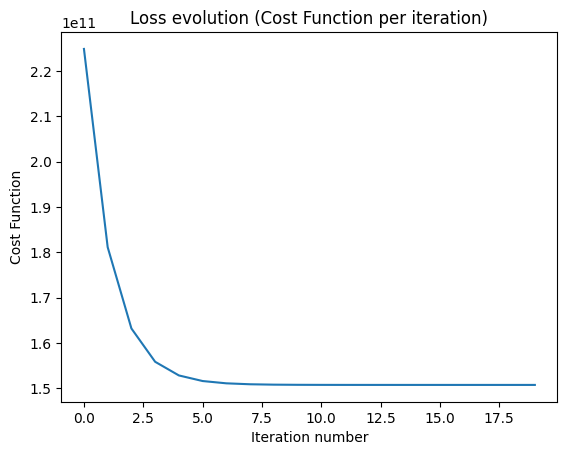

In [229]:
plt.plot(J_history)
plt.title("Loss evolution (Cost Function per iteration)")
plt.xlabel("Iteration number")
plt.ylabel("Cost Function")
plt.show()

In [230]:
def r2_score(y, y_):
    num = np.sum((y - y_)**2)
    denom = np.sum((y - y.mean())**2)

    score = 1 - num / denom
    return score

In [231]:
y_predicted_train = [w_final * i + b_final for i in x_train]

In [232]:
r2_score(y_train, y_predicted_train) # between 0 - 1. 

0.15494411061331048

In [233]:
y_predicted_validate = [w_final * i + b_final for i in x_validation]

In [234]:
r2_score(y_validation, y_predicted_validate)

0.45125560623548355

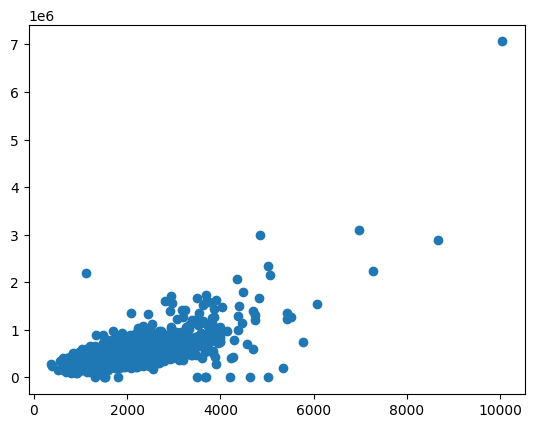

In [235]:
plt.scatter(x_validation, y_validation)

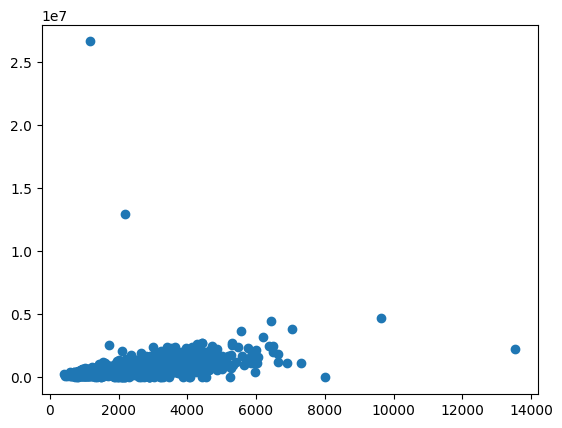

In [236]:
plt.scatter(x_train, y_train)

### Prediction

In [216]:
size_of_house = 20
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}$")
size_of_house = 30
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}$")
size_of_house = 50
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}$")
size_of_house = 60
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}$")
size_of_house = 4000
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}$")

A house with size(m^2) 20 has a price of: 5126.730660437064$
A house with size(m^2) 30 has a price of: 7690.032608862009$
A house with size(m^2) 50 has a price of: 12816.636505711898$
A house with size(m^2) 60 has a price of: 15379.938454136842$
A house with size(m^2) 4000 has a price of: 1025320.9061335649$


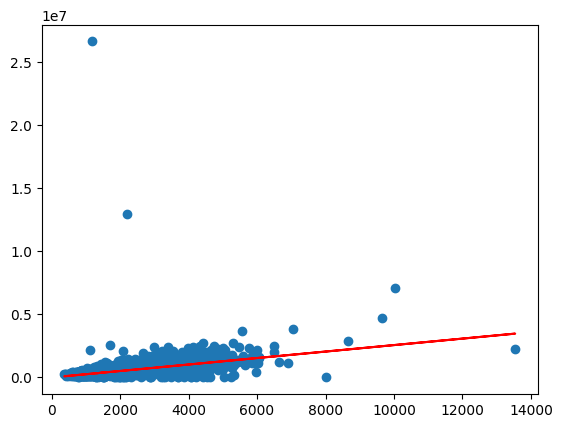

In [132]:
plt.scatter(x_train, y_train)
plt.plot(x_train, w_final * x_train + b_final, c='r')
plt.show()

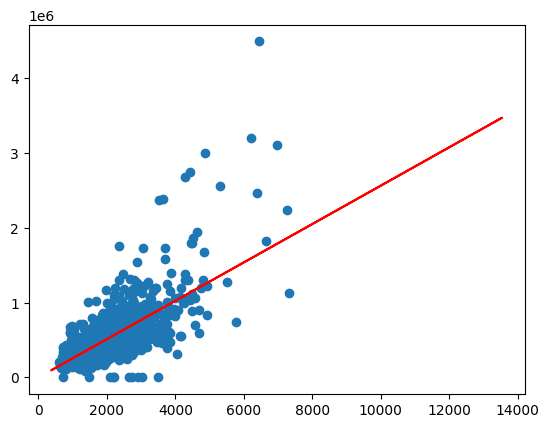

In [133]:
plt.scatter(x_validation, y_validation)
plt.plot(x_train, w_final * x_train + b_final, c='r')
plt.show()